# Subject influence on MAE
Our goal is to determine whether any certain subjects result in worse models performance. In the case of General models, we want to see whether certain subjects worsen MAE performance. In the case of Individual models, we want to see whether certain subjects perform worse overall when trying to predict fatigue.

### Imports and Data

In [2]:
import pandas as pd
from pandas import read_csv as read
import ast
import matplotlib.pyplot as plt
import seaborn as sns

df_t_g = read('../outputs/general/test_general.csv')
df_t_i = read('../outputs/individual/test_individual.csv')

### General Models
Here, we check the general models to see if any subjects used in the testing subset may have influence on the resulting model. We do this by getting the best *n* (stored in `df_t_g_max`) and the worst *n* (stored in `df_t_g_min`) models for each model type.

*n* is defined below as the variable `n_models`.

In [58]:
# For each model, gets the models with the biggest/smallest 3 (?) MAE values
n_models = 10

df_t_g_best = df_t_g.groupby('Model').apply(lambda x: x.nsmallest(n_models, 'MAE')).drop('Model', axis=1).reset_index().drop('level_1', axis=1)
df_t_g_worst = df_t_g.groupby('Model').apply(lambda x: x.nlargest(n_models, 'MAE')).drop('Model', axis=1).reset_index().drop('level_1', axis=1)

In [59]:
# Function that gets the ocurrence percentage of subjects in a provided dataframe
def get_appearances(df_t_g_m):
    count = {}

    # Gets the list of training subjects from dataframe
    for test_set in df_t_g_m['Training Subjects'].tolist():
        test_set = ast.literal_eval(test_set)  # Converts training subjects value to tuple from string
        
        # Stores the count of subjects in dict (key = subject, val = count)
        for subject in test_set:
            count[int(subject)] = count.get(int(subject), 0) + 1

    # Gets the total number of models in DataFrame
    total = len(df_t_g_m['Training Subjects'].tolist())
    appearances = {}

    # Gets percentage that subject appears out of total, stores in dict
    for subj, app in count.items():
        appearances[f"Subject {subj}"] = round((app / total) * 100, 2)

    return {k: v for k, v in sorted(appearances.items(), key=lambda item: item[1], reverse=True)}

In [60]:
# Percent that subjects appear in best n models:
get_appearances(df_t_g_best)

{'Subject 3': 67.78,
 'Subject 13': 45.56,
 'Subject 9': 40.56,
 'Subject 6': 36.11,
 'Subject 16': 35.0,
 'Subject 15': 26.67,
 'Subject 2': 17.78,
 'Subject 12': 8.89,
 'Subject 1': 7.22,
 'Subject 8': 4.44,
 'Subject 4': 3.33,
 'Subject 17': 3.33,
 'Subject 10': 1.67,
 'Subject 5': 1.67}

In [61]:
# Percent that subjects appear in worst n models:
get_appearances(df_t_g_worst)

{'Subject 10': 50.56,
 'Subject 1': 48.89,
 'Subject 17': 45.56,
 'Subject 5': 36.11,
 'Subject 4': 30.0,
 'Subject 12': 26.11,
 'Subject 8': 19.44,
 'Subject 2': 17.78,
 'Subject 15': 7.78,
 'Subject 16': 5.0,
 'Subject 13': 3.89,
 'Subject 9': 3.33,
 'Subject 6': 2.78,
 'Subject 3': 2.78}

### Individual Models
Here, we check the individual models to see which subjects perform the best and worst at predicting fatigue using their own data. We do this by getting the best and worst *n* models by MAE for each model. 

In [3]:
n_subjects = 3

In [4]:
df_t_i_best = df_t_i.groupby(['Model']).apply(lambda x: x.nsmallest(n_subjects, 'MAE')).drop(['Model'], axis=1)
# Models 8, 5, 1 frequently perform the best

In [34]:
df_t_i_best

MAE          MSE      RMSE  \
Model                                                                  
AdaBoost Regressor              108    0.1792       0.1784    0.4223   
                                72     0.4813       0.4038    0.6354   
                                11     0.6779       0.6419    0.8012   
Bayesian Ridge                  117    0.3153       0.1925    0.4388   
                                78     0.5260       0.3750    0.6123   
                                15     0.6999       0.7153    0.8458   
Decision Tree Regressor         115    0.1600       0.1600    0.4000   
                                75     0.5000       0.5000    0.7071   
                                6      0.6972       0.9225    0.9605   
Dummy Regressor                 118    0.3700       0.2425    0.4924   
                                87     0.6103       0.4764    0.6903   
                                8      0.7921       1.1916    1.0916   
Elastic Net                     116    0.3238       0.1998    0.4470   
                                83     0.5304       0.3750    0.6124   
                                7      0.7208       1.0131    1.0066   
Extra Trees Regressor           110    0.2436       0.1747    0.4180   
                                73     0.4984       0.3739    0.6115   
                                0      0.6045       0.5651    0.7517   
Gradient Boosting Regressor     109    0.2076       0.1617    0.4022   
                                77     0.4714       0.3761    0.6133   
                                3      0.6746       0.6953    0.8339   
Huber Regressor                 122    0.3415       0.1960    0.4427   
                                84     0.5026       0.3466    0.5887   
                                14     0.8023       1.0383    1.0190   
K Neighbors Regressor           119    0.3840       0.2896    0.5381   
                                85     0.5360       0.4368    0.6609   
                                9      0.7648       0.9524    0.9759   
Lasso Least Angle Regression    121    0.3326       0.2072    0.4552   
                                81     0.5305       0.3751    0.6124   
                                5      0.7180       1.0053    1.0027   
Lasso Regression                120    0.3326       0.2072    0.4552   
                                82     0.5305       0.3751    0.6124   
                                4      0.7180       1.0053    1.0027   
Least Angle Regression          215  142.8090   34540.5677  185.8509   
                                197  178.0782   57621.3856  240.0445   
                                35   446.5319  327103.7358  571.9298   
Light Gradient Boosting Machine 112    0.3478       0.2278    0.4772   
                                79     0.5213       0.4082    0.6389   
                                1      0.6328       0.6126    0.7827   
Linear Regression               86     0.5691       0.5248    0.7245   
                                10     0.8062       0.9685    0.9841   
                                124    1.0108       1.5866    1.2596   
Orthogonal Matching Pursuit     113    0.3147       0.1655    0.4068   
                                76     0.5305       0.3952    0.6286   
                                13     0.7592       0.9858    0.9929   
Passive Aggressive Regressor    88     0.6784       0.7717    0.8784   
                                16     0.8558       1.3760    1.1730   
                                123    0.9954       1.1028    1.0501   
Random Forest Regressor         111    0.2436       0.1688    0.4109   
                                74     0.5037       0.3702    0.6085   
                                2      0.6582       0.6477    0.8048   
Ridge Regression                114    0.3456       0.2086    0.4567   
                                80     0.5060       0.3555    0.5963   
                                12     0.6960       0.6927    0.8323   

         

In [5]:
df_t_i_worst = df_t_i.groupby(['Model']).apply(lambda x: x.nlargest(n_subjects, 'MAE')).drop(['Model'], axis=1)
# Models 16, 6, 13 frequently perform the worst

We can plot this too. Looking at the plot below, the worst performing subjects are almost always 16, 6 and 13.

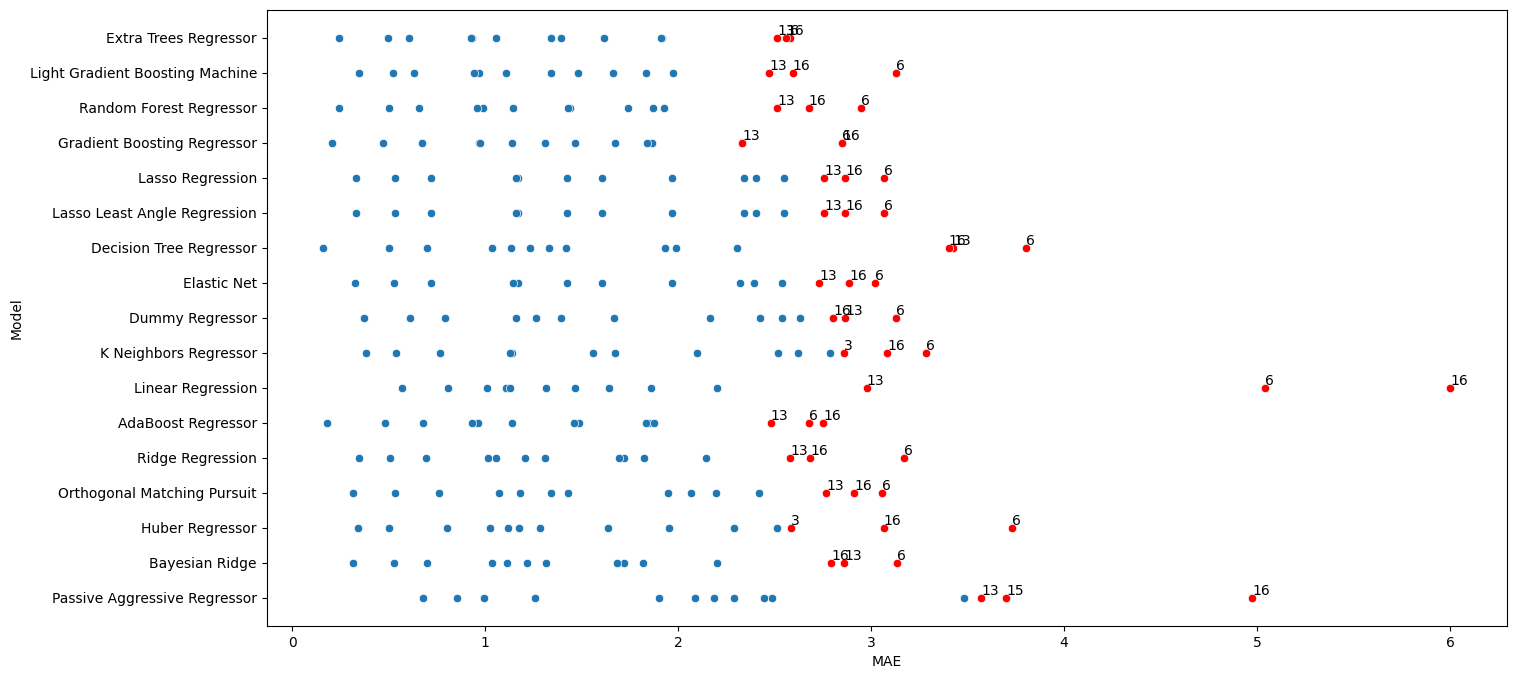

In [25]:
plt_df = df_t_i[df_t_i['Model'] != 'Least Angle Regression']
g = sns.scatterplot(data=plt_df, x='MAE', y='Model')
g.figure.set_size_inches(16, 8)

plt_df_worst = df_t_i_worst.reset_index()
plt_df_worst = plt_df_worst[plt_df_worst['Model'] != 'Least Angle Regression']

for index, row in plt_df_worst.iterrows():
    plt.text(row['MAE'], row['Model'], row['Subject'], horizontalalignment='left',verticalalignment='bottom',size='medium',color='black')

g = sns.scatterplot(data=plt_df_worst, x='MAE', y='Model', color="red")

plt.show()

In [4]:
data_original = read('../data/initial_features_limited_interpolation.csv')
temp_df = data_original.groupby(['subject', 'experimental_condition']).agg({'rpe':'max'}).reset_index()
subjects = temp_df[temp_df['rpe']>4]
min_rpe_df = (
    read('../data/initial_features_limited_interpolation.csv')
    .merge(right= subjects[['subject', 'experimental_condition']], how = 'right', on = ['subject', 'experimental_condition'])
)

,subject,experimental_condition,rpe,wrist_acc_time,wrist_acc_length,wrist_acc_mean,wrist_acc_rms,wrist_acc_mad,wrist_acc_std,wrist_acc_min,...,upperarm_acc_perc75,upperarm_jerk_mean,upperarm_jerk_rms,upperarm_jerk_mad,upperarm_jerk_std,upperarm_jerk_min,upperarm_jerk_max,upperarm_jerk_med,upperarm_jerk_perc25,upperarm_jerk_perc75
0,2,Condition 1.5-15,0,1.637791e+09,3570,1.020966,1.055511,0.156564,0.267866,0.336267,...,1.027061,2.211830,3.476043,1.962019,2.681920,0.022501,23.997835,1.237405,0.280398,3.268648
1,2,Condition 1.5-15,0,1.637792e+09,2401,1.049073,1.114753,0.240966,0.377069,0.297412,...,1.070348,3.753062,5.334226,2.796359,3.791370,0.036897,23.766781,2.670322,0.915139,5.002242
2,2,Condition 1.5-15,1,1.637792e+09,2384,1.046242,1.109861,0.237178,0.370441,0.351463,...,1.063130,3.554447,5.050175,2.676277,3.588255,0.042418,21.292811,2.577074,0.844062,4.891611
3,2,Condition 1.5-15,1,1.637792e+09,2415,1.047259,1.108495,0.230213,0.363405,0.189029,...,1.068416,3.403945,4.780679,2.470301,3.357487,0.038448,24.117224,2.544397,0.909715,4.671038
4,2,Condition 1.5-15,1,1.637792e+09,2415,1.044591,1.101713,0.228111,0.350216,0.330708,...,1.063797,3.100499,4.366065,2.277831,3.074630,0.040845,18.196637,2.220093,0.877469,4.211562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,17,Condition 2.5-15,5,1.648855e+09,3617,1.008881,1.024865,0.120175,0.180323,0.231716,...,1.061235,1.622655,2.336499,1.159320,1.681369,0.018629,14.372585,1.078012,0.522916,2.107922
660,17,Condition 2.5-15,5,1.648855e+09,3471,1.010253,1.027807,0.120770,0.189175,0.259063,...,1.057596,1.467271,2.078187,1.033784,1.471938,0.035406,10.632511,1.036987,0.454356,1.876953
661,17,Condition 2.5-15,5,1.648855e+09,3519,1.017450,1.043761,0.142382,0.232911,0.374043,...,1.063986,1.770426,2.443741,1.264558,1.684716,0.022219,12.341048,1.209454,0.550576,2.500165
662,17,Condition 2.5-15,5,1.648856e+09,3630,1.011757,1.027333,0.119441,0.178235,0.324728,...,1.059578,1.427003,1.979974,0.992372,1.372763,0.004812,9.251042,1.020153,0.449700,1.897094
